In [6]:
#Create seperate directories for training and testing images.

train_dir = 'Alzheimers dataset\AugmentedAlzheimerDataset'
test_dir = 'Alzheimers dataset\OriginalDataset'

<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\O'
C:\Users\chikk\AppData\Local\Temp\ipykernel_16896\40383585.py:3: SyntaxWarning: invalid escape sequence '\A'
  train_dir = 'Alzheimers dataset\AugmentedAlzheimerDataset'
C:\Users\chikk\AppData\Local\Temp\ipykernel_16896\40383585.py:4: SyntaxWarning: invalid escape sequence '\O'
  test_dir = 'Alzheimers dataset\OriginalDataset'


In [7]:
#Import all the required libraries for data pre-processing and training.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

The images are further partitioned into training and validation images with 80% training and 20% validation.

In [8]:
#Create instances of ImageDataGenerator by setting a rescale value and validation split.

train_datagen = ImageDataGenerator(rescale = 1/255. , validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [9]:
train_data = train_datagen.flow_from_directory(train_dir ,
                                               target_size = (224 , 224),    #Set image size.
                                               batch_size = 32,              #Set appropriate batch size to avoid overfitting.
                                               class_mode = 'categorical',   #Set type of labels.
                                               subset = 'training')

valid_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224 , 224),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               subset = 'validation')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224 , 224),         #Images from the OriginalDataset directory to be used for testing only
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 27186 images belonging to 4 classes.
Found 6795 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [10]:
#Define a function to plot the loss and accuracy curves of model training for better visualization.

def loss_and_accuracy(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs , loss , label = 'Training Loss')
  plt.plot(epochs , val_loss , label = 'Validation Loss')            #Loss curve
  plt.title('Loss Curve')
  plt.xlabel('epochs')
  plt.legend()
  plt.savefig('Loss_Curve.jpg')

  plt.figure()

  plt.plot(epochs , accuracy , label = 'training_accuracy')
  plt.plot(epochs , val_accuracy , label = 'validation_accuracy')    #Accuracy curve
  plt.title('Accuracy Curve')
  plt.yticks([0,0.2,0.4,0.6,0.8,1])
  plt.xlabel('epochs')
  plt.legend()
  plt.savefig('Accuracy_Curve.jpg')

In [11]:
#Give the classnames as a list
classnames = ['Mild Demented' , 'Moderate Demented' , 'Non-Demented' , 'Very Mild Demented']

In [12]:
#Define a function to prepare an image for prediction

def image_prep(filename , img_size = 224):
  #Read the image from filename
  image = tf.io.read_file(filename)
  #Decode the image into its RGB channels
  image = tf.image.decode_image(image , channels = 3)
  #Resize the image
  image = tf.image.resize(image , size = [img_size , img_size])
  #Rescale
  image = image/255.

  return image

In [13]:
#Define a function to make predictions on the prepared images
#Image along with the classified label is shown as output

def make_predictions(model , filename , classnames):
  #Load the image
  image = image_prep(filename)
  #Run the model on the image
  pred = model.predict(tf.expand_dims(image , axis=0))
  #Zero down on the class
  pred_class = classnames[tf.argmax(tf.round(pred)[0])]
  #Show the image and the label
  plt.imshow(image)
  plt.title(f'Predicted class: {pred_class}')
  plt.axis(False)

In [14]:
#Create an EarlyStopping callback method that stops training when accuracy does not improve.

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy' , patience=3)

In [15]:
model_1 = tf.keras.Sequential([
    layers.Conv2D(128 , 2 , activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128 , 2 , activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(4 , activation = 'softmax')
])

In [16]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [18]:
history_1 = model_1.fit(train_data,
                        epochs = 3,
                        steps_per_epoch = int(0.1*len(train_data)),
                        validation_data = valid_data,
                        callbacks = [callback],
                        verbose = 0)

In [19]:
len(history_1.history['loss'])

3

In [20]:
model_1.evaluate(train_data)

850/850 ━━━━━━━━━━━━━━━━━━━━ 660s 776ms/step - accuracy: 0.8330 - loss: 0.4430


[0.4452475905418396, 0.8317148685455322]

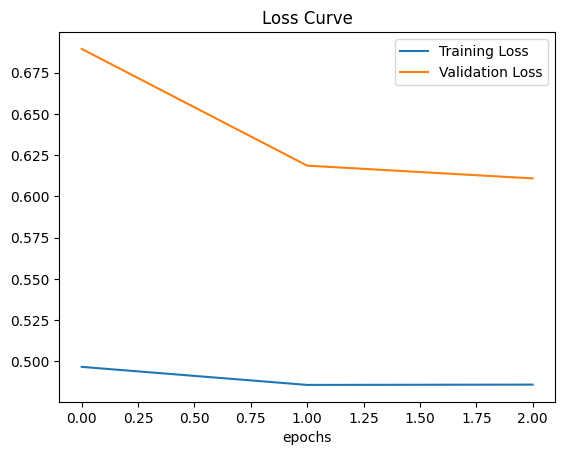

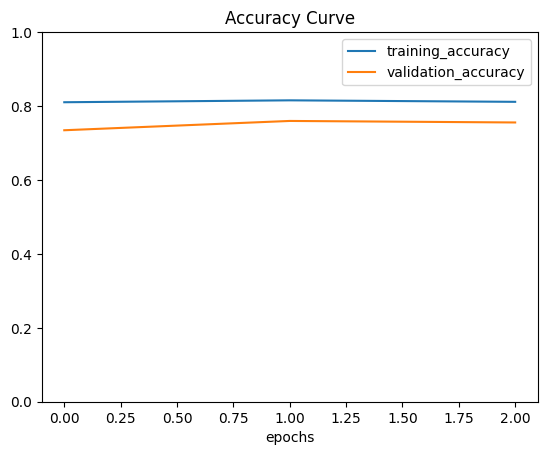

In [21]:
loss_and_accuracy(history = history_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


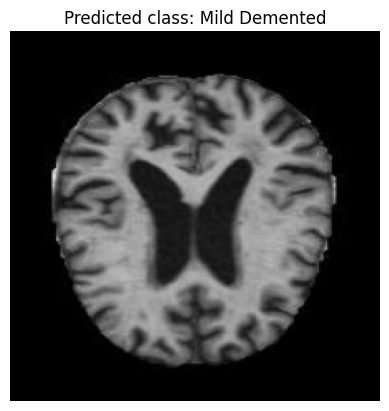

In [26]:
# make_predictions(model_1 ,'Alzheimers dataset\OriginalDataset\MildDemented\26 (23).jpg', classnames )
make_predictions(model_1, r'Alzheimers dataset\OriginalDataset\MildDemented\26 (23).jpg', classnames)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


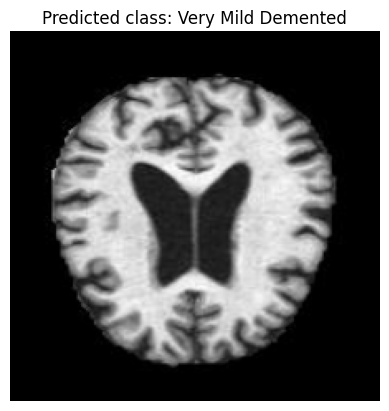

In [27]:
make_predictions(model_1, r'Alzheimers dataset\OriginalDataset\VeryMildDemented\27 (18).jpg', classnames)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


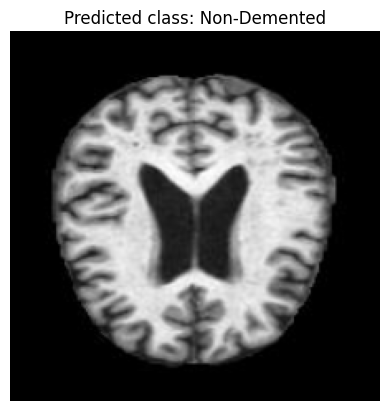

In [28]:
make_predictions(model_1, r'Alzheimers dataset\OriginalDataset\NonDemented\26 (82).jpg', classnames)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


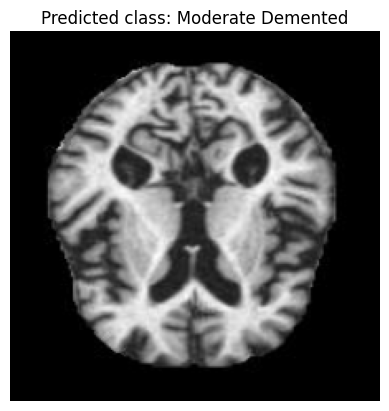

In [29]:
make_predictions(model_1, r'Alzheimers dataset\OriginalDataset\ModerateDemented\moderateDem14.jpg', classnames)